In [60]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
import numpy as np
import seaborn
seaborn.set()

In [61]:
game = "hex"
training_iterations = []
training_sessions = []
random_diffs = []
for training_session_file in Path(f"{game}/training/").iterdir():
    training_session = pd.read_csv(str(training_session_file), index_col=0)
    training_session.loc[:, "random_draws"] = (training_session.loc[:, "random_first_draws"] + training_session.loc[:, "random_second_draws"]) / 2
    training_session.loc[:, "random_wins"] = (training_session.loc[:, "random_first_wins"] + training_session.loc[:, "random_second_wins"]) / 2 + 0.5 * training_session.loc[:, "random_draws"]
    training_session.loc[:, "previous_draws"] = (training_session.loc[:, "previous_first_draws"] + training_session.loc[:, "previous_second_draws"]) / 2
    training_session.loc[:, "previous_wins"] = (training_session.loc[:, "previous_first_wins"] + training_session.loc[:, "previous_second_wins"]) / 2 + 0.5 * training_session.loc[:, "previous_draws"]
    training_session.loc[:, "model"] = int(training_session_file.stem)
    random_wins = training_session["random_wins"]
    random_diffs.append(random_wins[(random_wins < 1.0) | (random_wins.diff() != 0)].diff())
    
    random_training_session = training_session.loc[:, ["random_wins", "training_iterations", "model"]].rename(columns={"random_wins": "win_percentage"})
    random_training_session.loc[:, "against"] = "Random rollout"
    previous_training_session = training_session.loc[:, ["previous_wins", "training_iterations", "model"]].rename(columns={"previous_wins": "win_percentage"})
    previous_training_session.loc[:, "against"] = "Previous network"
    training_iterations.append(random_training_session["training_iterations"].max())
    training_sessions.extend([random_training_session, previous_training_session])
training_sessions = pd.concat(training_sessions)

In [62]:
print(training_iterations)
print(max(training_iterations))
print(min(training_iterations))
print(np.mean(training_iterations))
print(np.mean(training_sessions[training_sessions["against"] == "Previous network"]["win_percentage"]))
print(pd.concat(random_diffs).mean())

[310000, 310000, 340000, 310000, 320000, 330000, 340000, 320000, 320000, 340000, 320000, 310000, 320000, 340000, 310000, 310000, 310000, 340000, 320000, 320000]
340000
310000
322000.0
0.749359939759036
0.04619422572178478


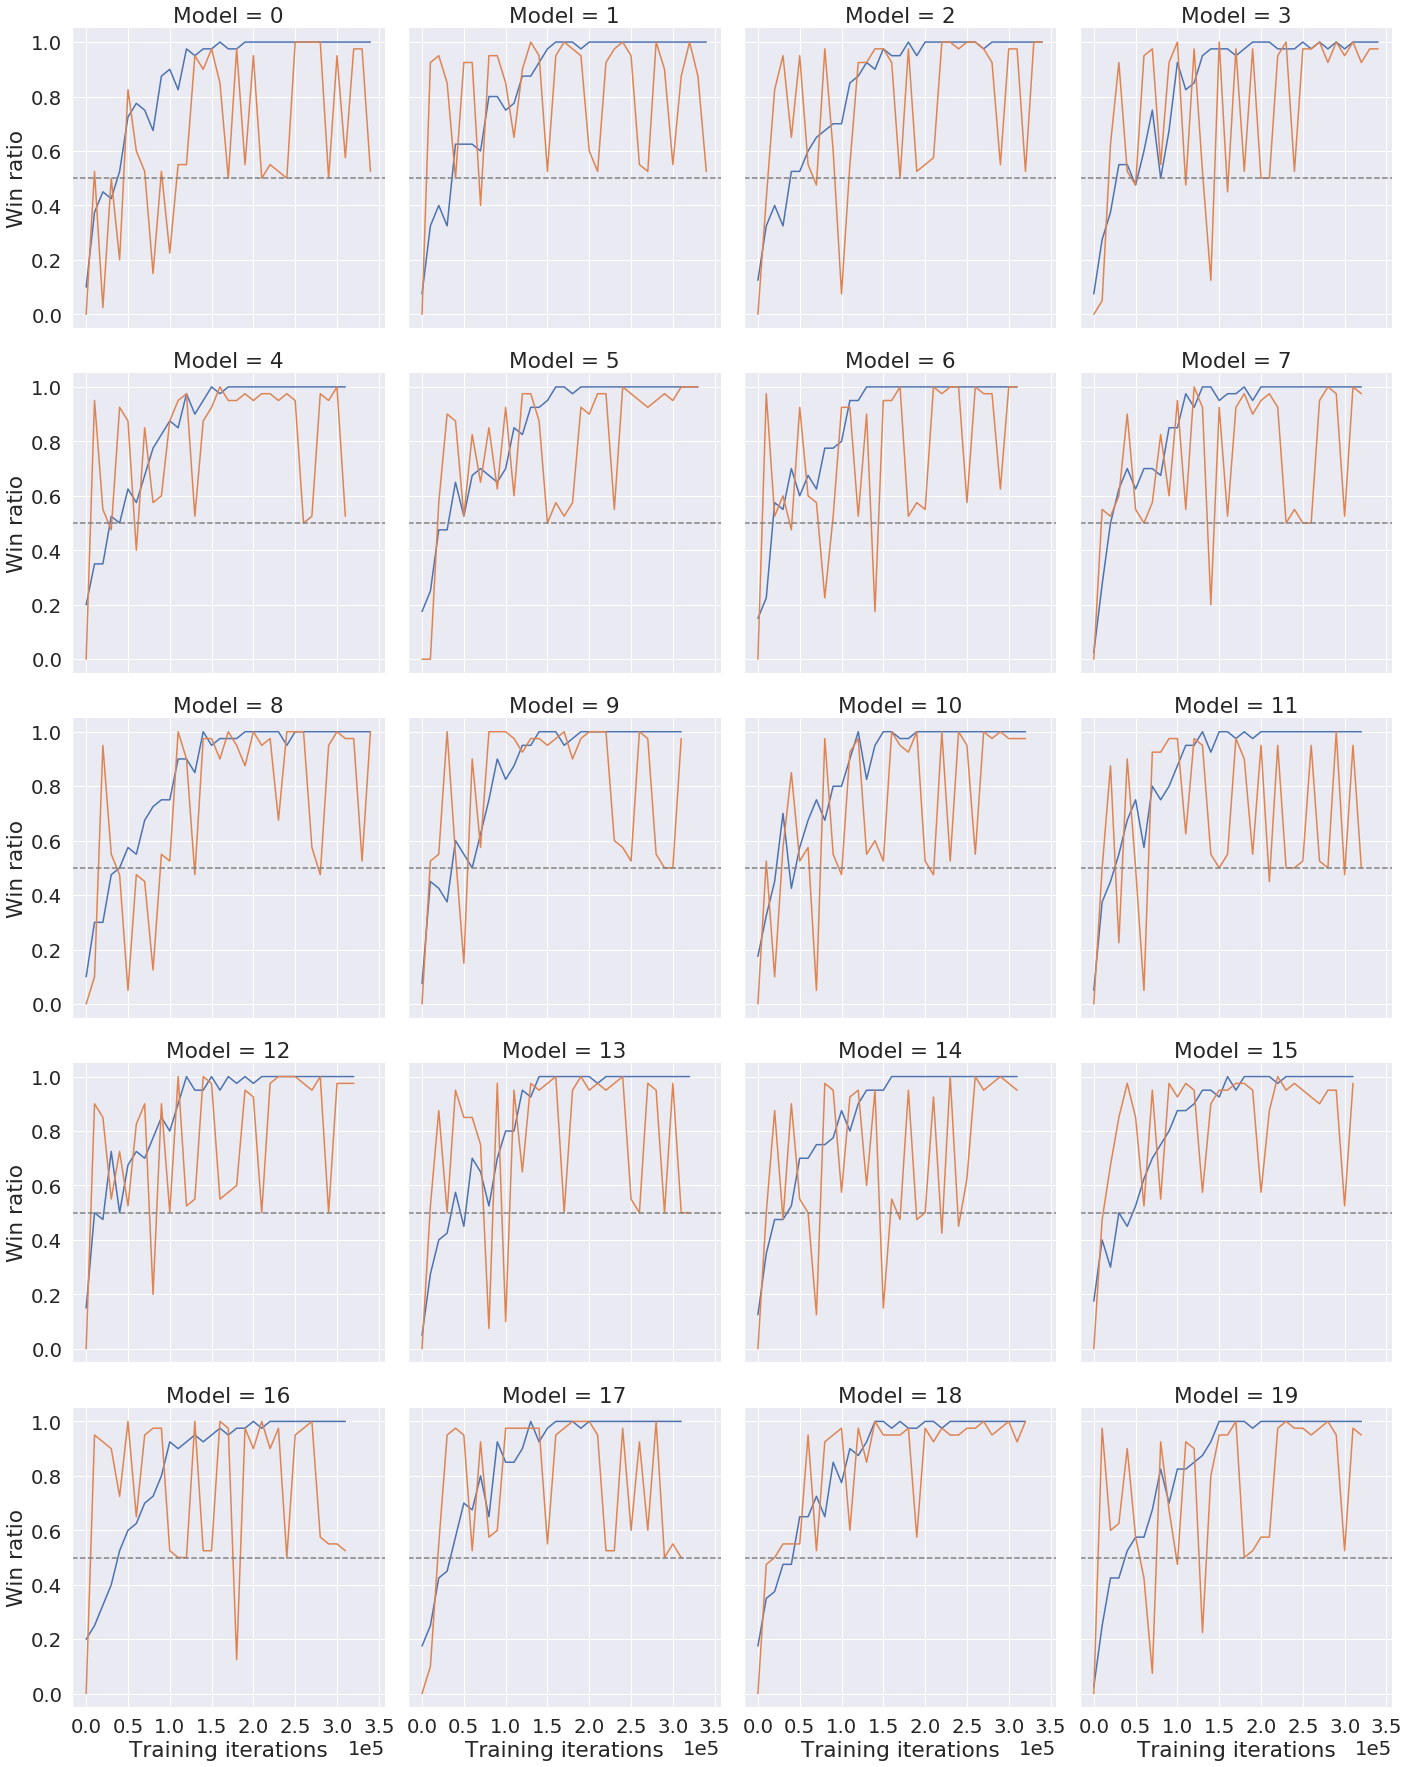

In [63]:
training_sessions = training_sessions.rename(columns={"training_iterations": "Training iterations", "win_percentage": "Win ratio", "model": "Model", "against": "Against"})
with seaborn.plotting_context("notebook", font_scale=1.8):
    g = seaborn.relplot(x="Training iterations", y="Win ratio", hue="Against", data=training_sessions, kind="line", col="Model", col_wrap=4)
g._legend.remove()
for ax in g.axes.flatten():
    ax.ticklabel_format(axis="both", style="sci", scilimits=(0, 0))
    ax.axhline(y=0.5, linestyle="--", color="gray")
g.savefig(f"{game}_training_wins.png", dpi=300)

In [46]:
print(training_iterations)
print(max(training_iterations))
print(min(training_iterations))
print(np.mean(training_iterations))

[340000, 340000, 320000, 320000, 320000, 320000, 310000, 310000, 310000, 310000, 320000, 320000, 340000, 340000, 310000, 330000, 310000, 320000, 340000, 310000]
340000
310000
322000.0
